<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

Name: Jolie Dolan<br>
RIN: 662020565

## Question 1

Use the Iris dataset and the SVM code shown in the first class. Define two new features using the original four features and then calculate the accuracy score of classification. The SVM classifier must use the new features and none of the original features for classification.


In [41]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target
# X currently only has four features

In [42]:
import numpy as np

# Defining two new features
X_new = np.zeros((X.shape[0], 2))
X_new[:, 0] = X[:, 0] + X[:, 1]  # Example: Sum of sepal length and sepal width
X_new[:, 1] = X[:, 2]**2  # Example: Square of petal length

# Now X_new contains the two new features
print("Shape of original features (X):", X.shape)
print("Shape of new features (X_new):", X_new.shape)
print(X_new)

Shape of original features (X): (150, 4)
Shape of new features (X_new): (150, 2)
[[ 8.6   1.96]
 [ 7.9   1.96]
 [ 7.9   1.69]
 [ 7.7   2.25]
 [ 8.6   1.96]
 [ 9.3   2.89]
 [ 8.    1.96]
 [ 8.4   2.25]
 [ 7.3   1.96]
 [ 8.    2.25]
 [ 9.1   2.25]
 [ 8.2   2.56]
 [ 7.8   1.96]
 [ 7.3   1.21]
 [ 9.8   1.44]
 [10.1   2.25]
 [ 9.3   1.69]
 [ 8.6   1.96]
 [ 9.5   2.89]
 [ 8.9   2.25]
 [ 8.8   2.89]
 [ 8.8   2.25]
 [ 8.2   1.  ]
 [ 8.4   2.89]
 [ 8.2   3.61]
 [ 8.    2.56]
 [ 8.4   2.56]
 [ 8.7   2.25]
 [ 8.6   1.96]
 [ 7.9   2.56]
 [ 7.9   2.56]
 [ 8.8   2.25]
 [ 9.3   2.25]
 [ 9.7   1.96]
 [ 8.    2.25]
 [ 8.2   1.44]
 [ 9.    1.69]
 [ 8.5   1.96]
 [ 7.4   1.69]
 [ 8.5   2.25]
 [ 8.5   1.69]
 [ 6.8   1.69]
 [ 7.6   1.69]
 [ 8.5   2.56]
 [ 8.9   3.61]
 [ 7.8   1.96]
 [ 8.9   2.56]
 [ 7.8   1.96]
 [ 9.    2.25]
 [ 8.3   1.96]
 [10.2  22.09]
 [ 9.6  20.25]
 [10.   24.01]
 [ 7.8  16.  ]
 [ 9.3  21.16]
 [ 8.5  20.25]
 [ 9.6  22.09]
 [ 7.3  10.89]
 [ 9.5  21.16]
 [ 7.9  15.21]
 [ 7.   12.25]
 [ 8

In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# training
X_train, X_test, y_train, y_test=train_test_split(
    X_new,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

# train svm
clf = svm.SVC()
clf.fit(X_train, y_train)

# predict and find accuracy score
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy score :', acc)

accuracy score : 0.95


## Question 2

Classify only the even numbered handwritten digits using MNIST digits dataset with a k-nearest neighbors classifier. The classifier must not see any odd numbered digit images as inputs. The classifier must also consider every pixel in the input image to make its classification decision. Can we use pairplot to visualize this data? Plot the classification results using a heatmap showing digits which were correctly classified and digits which were not correctly classified. How many 6’s in your test set were correctly classified?

In [44]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [45]:
# loading mnist dataset
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

In [46]:
# filter even digits
# boolean mask for even-numbered digits
even_mask = y_mnist.isin(['0', '2', '4', '6', '8'])

# filter X_mnist and y_mnist using the mask
X_even = X_mnist[even_mask]
y_even = y_mnist[even_mask]

print("Shape of filtered features (X_even):", X_even.shape)
print("Shape of filtered target labels (y even):", y_even.shape)

Shape of filtered features (X_even): (34418, 784)
Shape of filtered target labels (y even): (34418,)


In [47]:
# split data into training and testing sets
X_train_even, X_test_even, y_train_even, y_test_even = train_test_split(
    X_even, y_even, test_size=0.2, random_state=42, stratify=y_even
)

# print the shapes of the resulting sets
print("Shape of X_train_even:", X_train_even.shape)
print("Shape of X_test_even:", X_test_even.shape)
print("Shape of y_train_even:", y_train_even.shape)
print("Shape of y_test_even:", y_test_even.shape)

Shape of X_train_even: (27534, 784)
Shape of X_test_even: (6884, 784)
Shape of y_train_even: (27534,)
Shape of y_test_even: (6884,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_even, y_train_even)

KNeighborsClassifier()

In [49]:
# predictions
y_pred_even = knn_classifier.predict(X_test_even)

print("Shape of predictions (y_pred_even):", y_pred_even.shape)

Shape of predictions (y_pred_even): (6884,)


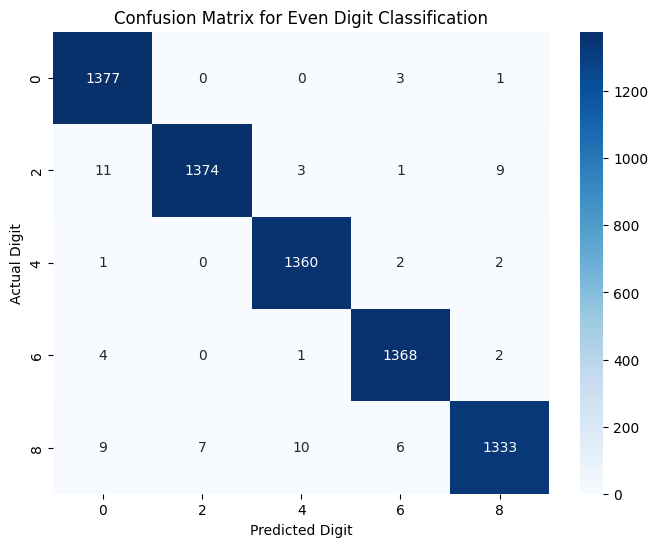

In [50]:
# confusion matrix
cm_even = confusion_matrix(y_test_even, y_pred_even)

# Get unique sorted labels from the test set for tick labels
labels = sorted(y_test_even.unique())

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_even, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels) # Set tick labels

plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix for Even Digit Classification')
plt.show()

According to the confusion matrix, 1368 6's were classified correctly out of 1375 6's.

While we technically can use a pairplot to visualize the data, it would not be ideal for this analysis. The features for this situation pixels from images. A pairplot shows all the combinations of features with each other. In this case with 784 pixels per picture, a pairplot would have hundreds of thousands of plots to sift through. This would be an overwhelming amount of data to get significant results out of.

## Question 3

Cluster the Iris species by writing your own k-means algorithm using THREE features (Or modify the algorithm we used in class). Show visualization of the data using a THREE dimensional scatter plot. Compare the clustering performance of your k-means algorithm to the sklearn implementation by making plots of the clusters from
your method and Scikit’s implementation by showing the clusters from your methods and from Scikit’s method. What happens when you vary the number of clusters?

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [52]:
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)

# select only three features
X_three_features = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']].to_numpy()

print("Shape of selected features (X_three_features):", X_three_features.shape)

Shape of selected features (X_three_features): (150, 3)


In [53]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
        self.centroids = None # Initialize centroids attribute

    def fit(self, X):
        # Initialize centroids by randomly selecting k data points from X
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices, :]

        while True:
            # Calculate distances from each data point to each centroid
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])

            # Assign each data point to the closest centroid
            self.clusters = np.argmin(distances, axis=0)

            # Calculate new centroids as the mean of the data points in each cluster
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])

            # Check for convergence: if the centroids haven't changed significantly
            if np.allclose(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        if self.centroids is None:
            raise RuntimeError("KMeans model has not been fitted yet.")
        # Calculate distances from each data point to each centroid
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        # Return the index of the closest centroid for each data point
        return np.argmin(distances, axis=0)

# Apply the modified KMeans to the three selected features
model_three_features = KMeans(k=3)
model_three_features.fit(X_three_features)
kmeans_labels_three_features = model_three_features.predict(X_three_features)

# Add the cluster labels to the dataframe for visualization
df['kmeans_labels_three_features'] = kmeans_labels_three_features

display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_labels_three_features
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


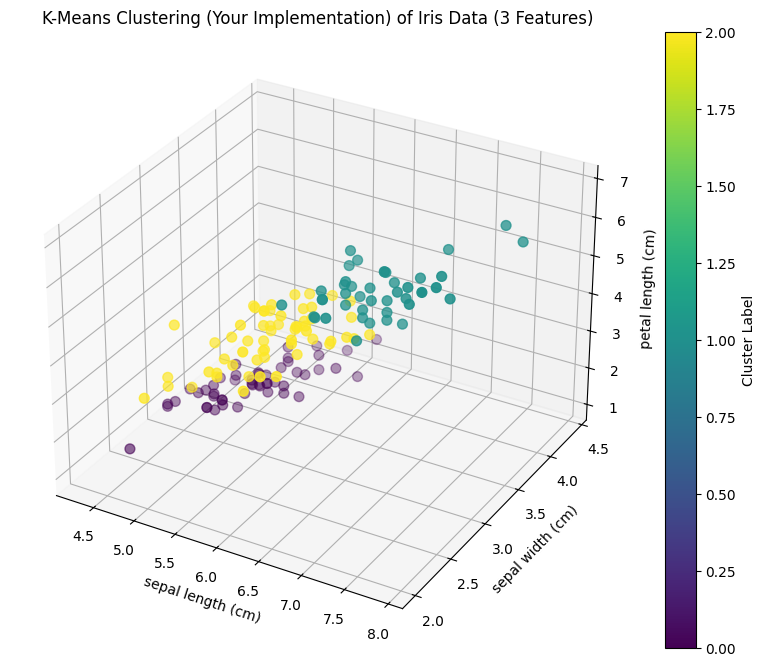

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=df['kmeans_labels_three_features'], cmap='viridis', s=50)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
ax.set_title('K-Means Clustering (Your Implementation) of Iris Data (3 Features)')

plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [55]:
from sklearn.cluster import KMeans

# Instantiate KMeans with 3 clusters and a random state for reproducibility
sklearn_kmeans_three_features = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model to the data with three features
sklearn_kmeans_three_features.fit(X_three_features)

# Predict the cluster labels and store them in the DataFrame
df['sklearn_kmeans_labels_three_features'] = sklearn_kmeans_three_features.predict(X_three_features)

display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_labels_three_features,sklearn_kmeans_labels_three_features
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


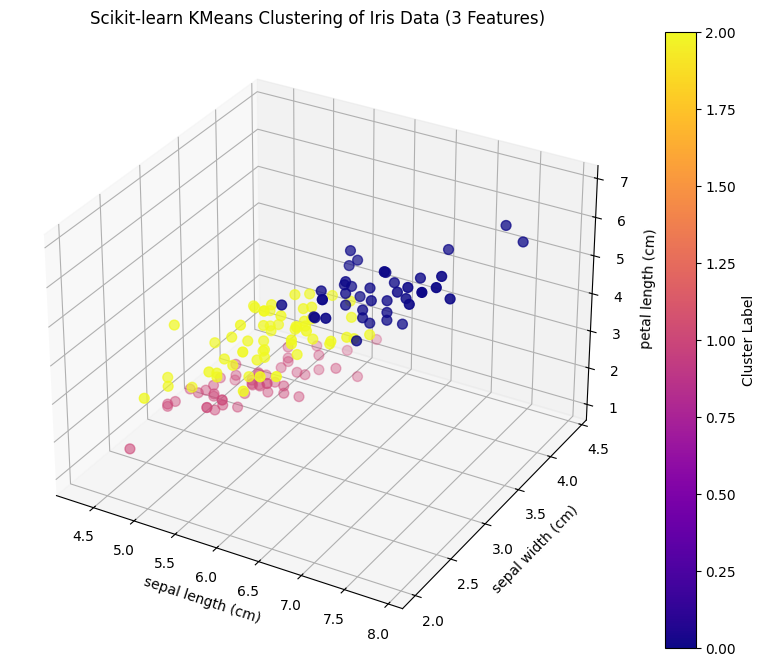

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=df['sklearn_kmeans_labels_three_features'], cmap='plasma', s=50)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
ax.set_title("Scikit-learn KMeans Clustering of Iris Data (3 Features)")

cbar = plt.colorbar(scatter, label='Cluster Label')
plt.show()

When you vary the clusters, the number of groups that form within the plot will change to equate to that value. For our current situation, a cluster of three is suitable as there are only three species we are viewing. Increasing the value of the clusters will create error as a group will form that does not equate to anything physical. By having less than three groups, one category of species is getting missed out on.